# Implied Vol Surface
Visualize the implied vol surface for Local Volatility, rBergomi, and the Heston model.

In [ ]:
from datetime import datetime

import numpy as np
from matplotlib import pyplot as plt
from qablet.base.flags import Stats

from data.samples import rbergomi_data, heston_data, localvol_data
from qablet.heston.mc import HestonMCModel
from qablet.black_scholes.mc import LVMCModel
from src.model.rbergomi import rBergomiMCModel
from src.utils import iv_surface

### Methodology
We will compare volatility smiles for a number of expirations. We will also compare the term structure of atm volatilities.

In [ ]:
prc_dt = datetime(2013, 8, 14)
ticker = "SPX"
spot = 1685.39

# We will define a forwards for various expirations
expirations = [
    # datetime(2013, 8, 16),  # in two days
    # datetime(2013, 8, 23),  # weekly
    datetime(2013, 8, 30),  # weekly
    datetime(2013, 9, 20),  # monthly
    datetime(2013, 12, 20),  # quarterly
    datetime(2014, 3, 21),  # quarterly
    datetime(2014, 6, 20),  # quarterly
]

logK = np.arange(-0.25, 0.1, 0.01)
strikes = spot * np.exp(logK)
atm_idx = 25

Instead of calling `model.price` for each option separately, we will use the utility `iv_surface` in `src.utils`



### Local Vol Surface

In [ ]:
model = LVMCModel()
dataset = localvol_data()
dataset["MC"]["FLAGS"] = Stats.CASHFLOW

localvol_iv = iv_surface("SPX", model, dataset, strikes, expirations)

### Bergomi Vol Surface

In [ ]:
model = rBergomiMCModel()
dataset = rbergomi_data()
dataset["MC"]["FLAGS"] = Stats.CASHFLOW

bergomi_iv = iv_surface("SPX", model, dataset, strikes, expirations)

### Heston Vol Surface

In [ ]:
model = HestonMCModel()
dataset = heston_data()
dataset["MC"]["FLAGS"] = Stats.CASHFLOW

heston_iv = iv_surface("SPX", model, dataset, strikes, expirations)

### Plot Each Expiration Smile

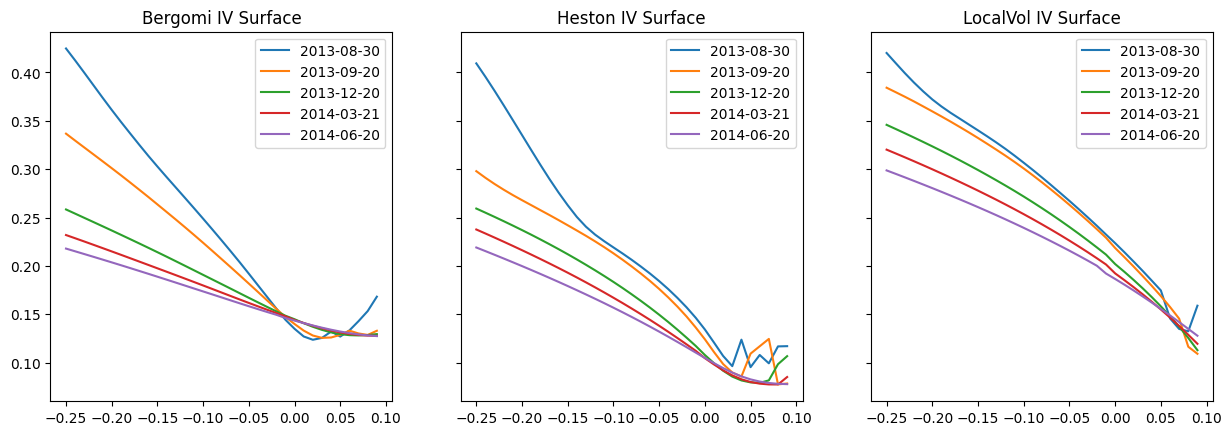

In [ ]:
ivs = [bergomi_iv, heston_iv, localvol_iv]
models = ["Bergomi", "Heston", "LocalVol"]

fig, axes = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(15)

for ax, iv, label in zip(axes, ivs, models):
    for i, exp in enumerate(expirations):
        ax.plot(logK, iv[i, :], label=exp.strftime("%Y-%m-%d"))
        ax.legend()
        ax.set_title(f"{label} IV Surface")

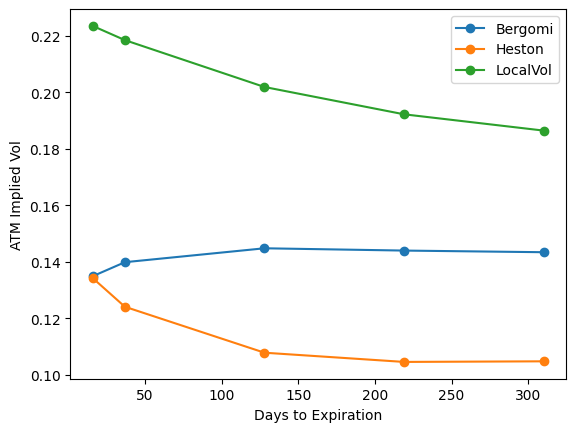

In [ ]:
for iv, label in zip(ivs, models):
    plt.plot(
        [(exp - prc_dt).days for exp in expirations],
        iv[:, atm_idx],
        label=label,
        marker="o",
    )
plt.xlabel("Days to Expiration")
plt.ylabel("ATM Implied Vol")
plt.legend()